# Exploratory Data analysis with python

- Importing necessary libraries for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('C:\\Users\\Admin\\Documents\\Business Analytics RB\\dataset_assignment 2.csv')

# 1. Analyzing the Dataset

In [ ]:
data

,Time,UnitCost,Sales,Profit
0,0,10.993428,63.993554,49.624235
1,1,9.703471,59.590289,49.164225
2,2,11.255377,51.282970,36.065493
3,3,12.986060,44.557539,30.031671
4,4,9.451693,58.345683,39.425916
...,...,...,...,...
995,995,-10.462201,89.006417,99.856021
996,996,13.675373,178.371338,35.984728
997,997,-8.658314,70.154347,72.603858
998,998,-11.102358,77.682664,90.455904


In [ ]:
data['UnitCost'].head(4)

0    10.993428
1     9.703471
2    11.255377
3    12.986060
Name: UnitCost, dtype: float64

In [ ]:
data.describe()

,Time,UnitCost,Sales,Profit
count,1000.000000,900.000000,900.000000,900.000000
mean,499.500000,0.992177,70.787920,63.338099
std,288.819436,7.414824,25.675284,21.223946
min,0.000000,-14.387759,26.867017,-37.267568
25%,249.750000,-4.512527,57.190272,50.380186
50%,499.500000,0.237956,66.626838,64.041522
75%,749.250000,5.766856,76.961368,79.059464
max,999.000000,30.771090,189.417912,120.865278


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      1000 non-null   int64  
 1   UnitCost  900 non-null    float64
 2   Sales     900 non-null    float64
 3   Profit    900 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


- **Calculating Central Tendencies**

In [ ]:
mean = data.mean()
print('mean =' , mean)

mean = Time        499.500000
UnitCost      0.992177
Sales        70.787920
Profit       63.338099
dtype: float64


In [ ]:
median = data.median()
print('median =' , median)


median = Time        499.500000
UnitCost      0.237956
Sales        66.626838
Profit       64.041522
dtype: float64


In [ ]:
mode = data.mode().iloc[0]
print('mode =' , mode)


mode = Time         0.000000
UnitCost   -14.387759
Sales       26.867017
Profit     -37.267568
Name: 0, dtype: float64


In [ ]:
std_dev = data.std()
print('standard deviation =' , std_dev)

standard deviation = Time        288.819436
UnitCost      7.414824
Sales        25.675284
Profit       21.223946
dtype: float64


- **Identifying the trend of data**


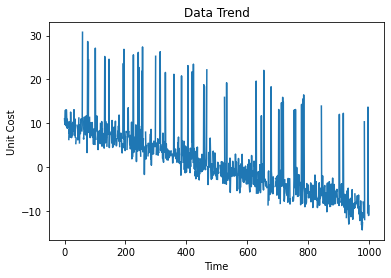

In [ ]:
#UnitCost

plt.plot(data.iloc[0:,1])
plt.xlabel('Time')
plt.ylabel('Unit Cost')
plt.title('Data Trend')
plt.show()

The graph shows `Unit Cost` over `Time` and it appears to exhibit a downward trend overall with some fluctuations.

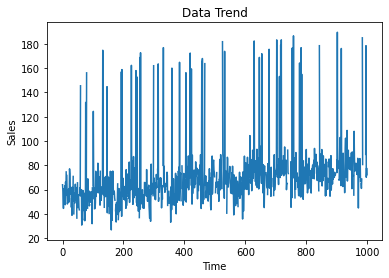

In [ ]:
#Sales

plt.plot(data.iloc[0:,2])
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Data Trend')
plt.show()

Above graph of `Sales` over `Time`shows increasing and decreasing fluctuaitons but without a clear seasonal or cyclic pattern visible.

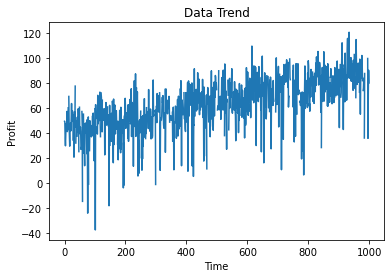

In [ ]:
#Profit

plt.plot(data.iloc[0:,3])
plt.xlabel('Time')
plt.ylabel('Profit')
plt.title('Data Trend')
plt.show()

The fluctuations of `Profit` appears to be similar to `Sales` in the plotted range which shows a possible relationship between two features.

# 2. Missing Values

In [ ]:
data.isnull().sum()

Time          0
UnitCost    100
Sales       100
Profit      100
dtype: int64

The dataset contains missing values in `UnitCost`, `Sales`, and `Profit`, each having 100 missing values. The Time column does not have any missing values.

# 3. Handling Missing Values

In [ ]:
data_interpolated = data.interpolate()

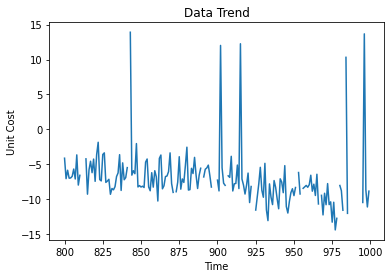

In [ ]:
#UnitCost before cleaning the data

plt.plot(data.iloc[800:,1])
plt.xlabel('Time')
plt.ylabel('Unit Cost')
plt.title('Data Trend')
plt.show()

In this graph we can see empty spaces in the trend displaying missing values. **(Before applying interpolated data)**

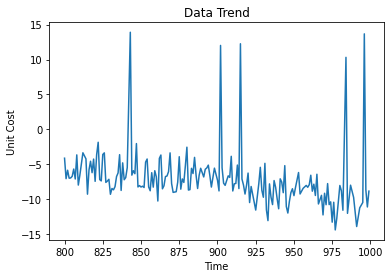

In [ ]:
#UnitCost after cleaning the data

plt.plot(data_interpolated.iloc[800:,1])
plt.xlabel('Time')
plt.ylabel('Unit Cost')
plt.title('Data Trend')
plt.show()

The same graph now shows a complete pattern with 0 missing values in the data. **(After applying interpolated data)**

# 4. Moving Average

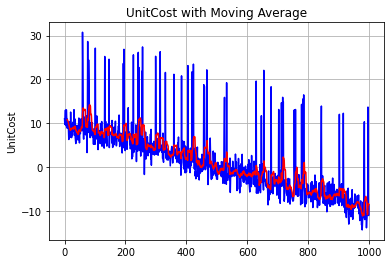

In [ ]:
#Unit Cost
window_size = 10
moving_average = data_interpolated['UnitCost'].rolling(window_size).mean()
plt.plot(data_interpolated['UnitCost'], 'b', moving_average, 'r')
plt.title('UnitCost with Moving Average')
plt.ylabel('UnitCost')
plt.grid(True)

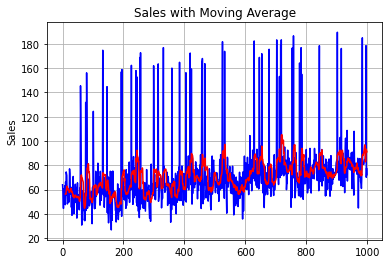

In [ ]:
#Sales
window_size = 10
moving_average = data_interpolated['Sales'].rolling(window_size).mean()
plt.plot(data_interpolated['Sales'], 'b', moving_average, 'r')
plt.title('Sales with Moving Average')
plt.ylabel('Sales')
plt.grid(True)

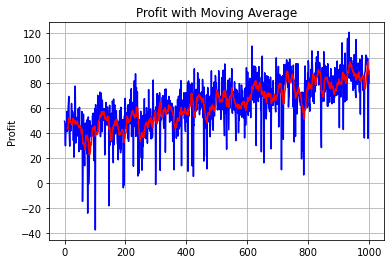

In [ ]:
#Profit
window_size = 10
moving_average = data_interpolated['Profit'].rolling(window_size).mean()
plt.plot(data_interpolated['Profit'], 'b', moving_average, 'r')
plt.title('Profit with Moving Average')
plt.ylabel('Profit')
plt.grid(True)

For graphs of all 3 Features in dataset `UnitCost`, `Sales`, and `Profit` the red line shows smoothed data with very less fluctuations which makes it easier to observe trends in data over `Time`.

# 5. Identifying Outliers

Text(0, 0.5, 'Frequency')

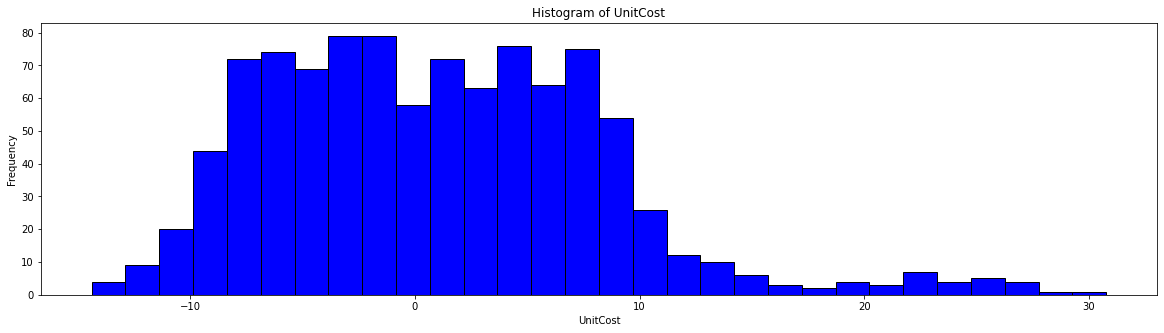

In [ ]:
#For UnitCost
plt.figure(figsize = (20, 5))
plt.hist(data_interpolated['UnitCost'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of UnitCost')
plt.xlabel('UnitCost')
plt.ylabel('Frequency')

In this histogram of `UnitCost` the presence of outliers is not clear.

Text(0, 0.5, 'Frequency')

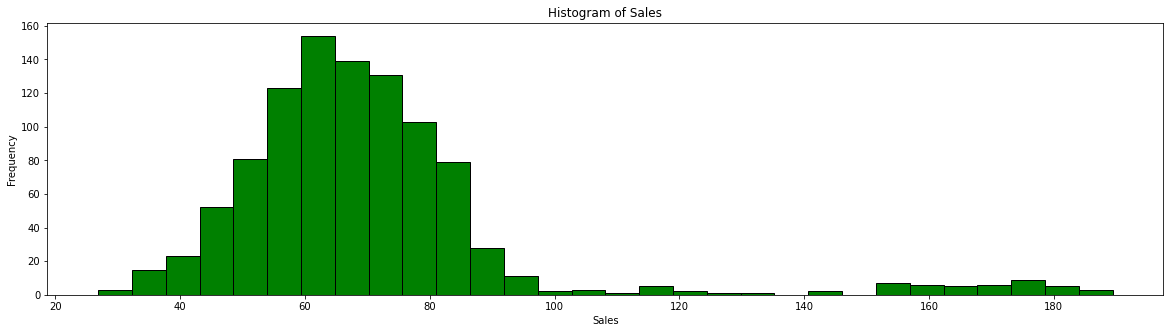

In [ ]:
#For Sales
plt.figure(figsize = (20, 5))
plt.hist(data_interpolated['Sales'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

For `Sales` Outliers can be seen from range `140` to `180`.

Text(0, 0.5, 'Frequency')

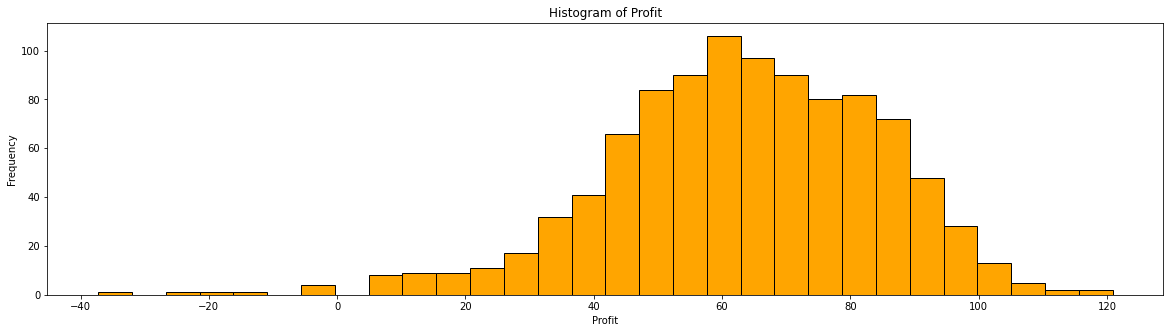

In [ ]:
#For Profit
plt.figure(figsize = (20, 5))
plt.hist(data_interpolated['Profit'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')

In the graph of `Profit` there are no extreme outliers but a very few part of the data lies in the range of `-20` to `-40` which can be considered as points different from majority **(Outliers)**.

# 6. Correlation

In [ ]:
# Performing correlation analysis on the cleaned dataset
correlation = data_interpolated[['UnitCost', 'Sales', 'Profit']].corr()

# Displaying the correlation between UnitCost, Sales and Profit
correlation


,UnitCost,Sales,Profit
UnitCost,1.000000,0.242564,-0.830318
Sales,0.242564,1.000000,-0.012948
Profit,-0.830318,-0.012948,1.000000


from the above correlation coefficient table we can see following relations between all three feature from the dataset:

- `UnitCost` & `Sales` have a Positive Correlation.
- `UnitCost` & `Profit` have a Negative Correlation.
- Correlation between `Sales` & `Profit` is very weak almost `0` which shows there is no clear relationship between these to 2     features.